# Strojno učenje

### PAZI ce je f-score zelo majhen, je lahko ker dobi za določen class z nizkim N vrednost 0 in naredi povprečje!

In [69]:
import warnings
warnings.filterwarnings('always')

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("data_cleaned.xlsx")
df = df.drop('Unnamed: 0', axis=1)

In [71]:
#Poskusimo narediti le dva classa

#df['Uspesnost'].replace({1:0,2: 0, 3: 1}, inplace=True)

In [72]:
#df = df.apply(pd.to_numeric, errors='coerce')

In [73]:
df.head()

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,2,5,3,3,2,0,1,0,17,27,19,17,25,26
1,3,2,3,2,2,0,1,0,20,22,20,31,33,20
2,2,4,2,2,2,0,1,0,27,30,25,25,25,23
3,3,2,2,2,1,0,1,0,20,17,21,25,34,25
4,2,4,2,2,3,0,1,1,21,24,23,23,20,24


In [74]:
X = df.drop("Uspesnost", axis=1)
y = df["Uspesnost"]

In [75]:
from numpy import unique
classes = unique(y)
total = len(y)
for c in classes:
 n_examples = len(y[y==c])
 percent = n_examples / total * 100
 print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

> Class=1 : 6/89 (6.7%)
> Class=2 : 39/89 (43.8%)
> Class=3 : 44/89 (49.4%)


## Strojno učenje

In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to transform categorical columns using one-hot encoding
def transform_categorical_one_hot(X, categorical_cols):
    ct = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(), categorical_cols)],
        remainder='passthrough'
    )
    return ct.fit_transform(X)

classifiers = [
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianMixture(n_components=2),
    LinearDiscriminantAnalysis(),
    AdaBoostClassifier(n_estimators=1000),
    GradientBoostingClassifier(n_estimators=1000),
    SVC(kernel='rbf'),  # Support Vector Classifier
    RandomForestClassifier(n_estimators=1000)  # Random Forest Classifier
]

classifier_names = [
    "Naive Bayes",
    "K-Nearest Neighbors",
    "Decision Tree",
    "Gaussian Mixture",
    "Linear Discriminant Analysis",
    "AdaBoost",
    "Gradient Boosting",
    "Support Vector Machine",
    "Random Forest"
]

categorical_columns = ["Razred", "Profesor", "Spol"]  # Example categorical columns
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Training and evaluation loop with cross-validation
for clf, name in zip(classifiers, classifier_names):
    print(name)
    # Apply transformations to handle categorical data using one-hot encoding
    if categorical_columns:
        X_transformed = transform_categorical_one_hot(X, categorical_columns)
    else:
        X_transformed = X
    
    scores = cross_validate(clf, X_transformed, y, scoring=scoring, cv=5)
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision_macro'])
    recall = np.mean(scores['test_recall_macro'])
    f1 = np.mean(scores['test_f1_macro'])
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }, ignore_index=True)

# Display results DataFrame
print(results_df)

# Save results to a CSV file
results_df.to_csv('classification_results_general.csv', index=False, float_format='%.3f')

Naive Bayes
K-Nearest Neighbors


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\1833414540.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classifica

Decision Tree
Gaussian Mixture


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bor

Linear Discriminant Analysis
AdaBoost


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\1833414540.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Gradient Boosting


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\1833414540.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classifica

Support Vector Machine
Random Forest


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\U

                     Classifier  Accuracy  Precision    Recall  F1-score
0                   Naive Bayes  0.337908   0.271785  0.376852  0.257900
1           K-Nearest Neighbors  0.505229   0.343690  0.360979  0.343159
2                 Decision Tree  0.472549   0.321667  0.336243  0.315785
3              Gaussian Mixture  0.022222   0.005882  0.050000  0.010526
4  Linear Discriminant Analysis  0.450327   0.327565  0.380952  0.311362
5                      AdaBoost  0.484314   0.306623  0.350397  0.316360
6             Gradient Boosting  0.516340   0.373740  0.376323  0.348428
7        Support Vector Machine  0.449673   0.158780  0.303704  0.208051
8                 Random Forest  0.505229   0.313495  0.366138  0.319401


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\1833414540.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


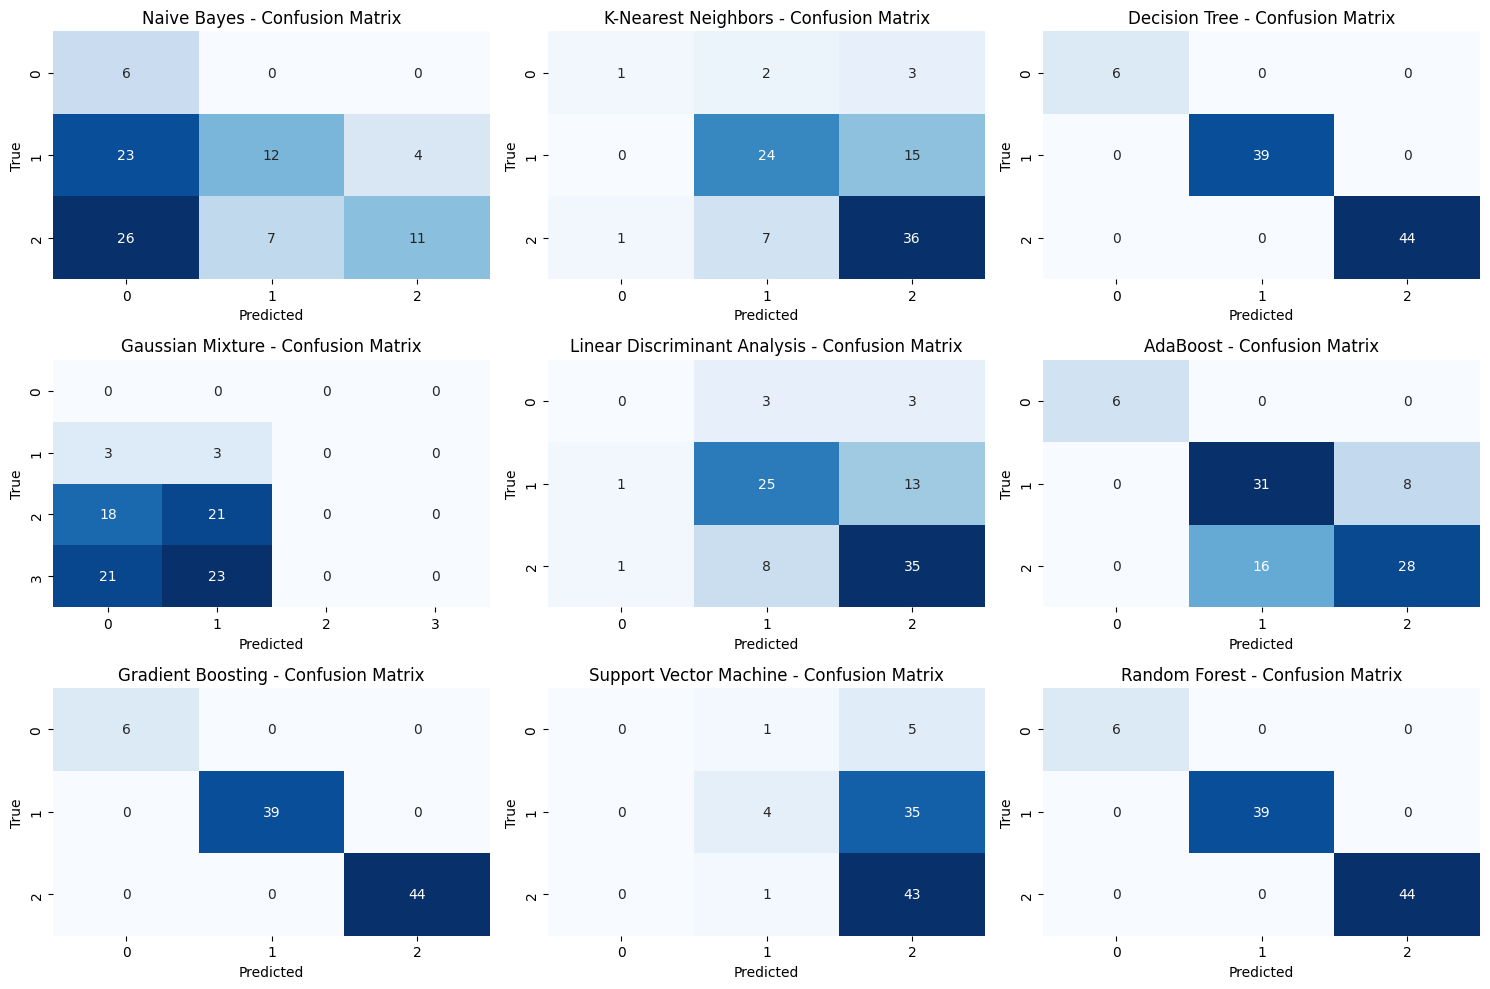

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (Previous code remains the same)

# Confusion Matrix for each classifier
plt.figure(figsize=(15, 10))
#plt.suptitle('Confusion Matrix for Classifiers', y=0.94)
for i, (clf, name) in enumerate(zip(classifiers, classifier_names)):
    clf.fit(X_transformed, y)
    y_pred = clf.predict(X_transformed)
    cm = confusion_matrix(y, y_pred)
    plt.subplot(3, 3, i + 1)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

### z le dvema classoma

In [78]:
df = pd.read_excel("data_cleaned.xlsx")
df = df.drop('Unnamed: 0', axis=1)
#Poskusimo narediti le dva classa

df['Uspesnost'].replace({1:0,2: 0, 3: 1}, inplace=True)

X = df.drop("Uspesnost", axis=1)
y = df["Uspesnost"]

classes = unique(y)
total = len(y)
for c in classes:
 n_examples = len(y[y==c])
 percent = n_examples / total * 100
 print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

> Class=0 : 45/89 (50.6%)
> Class=1 : 44/89 (49.4%)


In [79]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

for clf, name in zip(classifiers, classifier_names):
    print(name)
    # Apply transformations to handle categorical data using one-hot encoding
    if categorical_columns:
        X_transformed = transform_categorical_one_hot(X, categorical_columns)
    else:
        X_transformed = X
    
    scores = cross_validate(clf, X_transformed, y, scoring=scoring, cv=5)
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision_macro'])
    recall = np.mean(scores['test_recall_macro'])
    f1 = np.mean(scores['test_f1_macro'])
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }, ignore_index=True)

# Display results DataFrame
print(results_df)

results_df.to_csv('classification_results_two_classes.csv', index=False, float_format='%.3f')

Naive Bayes
K-Nearest Neighbors


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\269864890.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\269864890.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\269864890.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

Decision Tree
Gaussian Mixture


C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\269864890.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\269864890.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Linear Discriminant Analysis
AdaBoost


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\269864890.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Gradient Boosting


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\269864890.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\269864890.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Support Vector Machine
Random Forest


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     Classifier  Accuracy  Precision    Recall  F1-score
0                   Naive Bayes  0.583007   0.539103  0.580556  0.538930
1           K-Nearest Neighbors  0.516340   0.520989  0.518056  0.505958
2                 Decision Tree  0.517647   0.511096  0.516667  0.503558
3              Gaussian Mixture  0.539869   0.580678  0.531667  0.446796
4  Linear Discriminant Analysis  0.562745   0.481618  0.561111  0.504291
5                      AdaBoost  0.473203   0.421459  0.469444  0.419735
6             Gradient Boosting  0.550980   0.503398  0.548611  0.509487
7        Support Vector Machine  0.607190   0.638452  0.606944  0.586109
8                 Random Forest  0.561438   0.512879  0.559722  0.520000


C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\269864890.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


### droppamo slabe variable

In [80]:
df.head()

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,0,5,3,3,2,0,1,0,17,27,19,17,25,26
1,1,2,3,2,2,0,1,0,20,22,20,31,33,20
2,0,4,2,2,2,0,1,0,27,30,25,25,25,23
3,1,2,2,2,1,0,1,0,20,17,21,25,34,25
4,0,4,2,2,3,0,1,1,21,24,23,23,20,24


In [81]:
df = pd.read_excel("data_cleaned.xlsx")
df = df.drop(['Unnamed: 0', "Sensing", "Judging", "Feeling", "Motivacija", "Anksioznost"], axis=1)

#df['Uspesnost'].replace({1:0,2: 0, 3: 1}, inplace=True)

X = df.drop("Uspesnost", axis=1)
y = df["Uspesnost"]

In [82]:
categorical_columns = ["Razred", "Profesor", "Spol"]  # Example categorical columns
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Training and evaluation loop with cross-validation
for clf, name in zip(classifiers, classifier_names):
    print(name)
    # Apply transformations to handle categorical data using one-hot encoding
    if categorical_columns:
        X_transformed = transform_categorical_one_hot(X, categorical_columns)
    else:
        X_transformed = X
    
    scores = cross_validate(clf, X_transformed, y, scoring=scoring, cv=5)
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision_macro'])
    recall = np.mean(scores['test_recall_macro'])
    f1 = np.mean(scores['test_f1_macro'])
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }, ignore_index=True)

# Display results DataFrame
print(results_df)

results_df.to_csv('classification_results_without_psychology.csv', index=False, float_format='%.3f')

Naive Bayes
K-Nearest Neighbors


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

Decision Tree
Gaussian Mixture


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bor

Linear Discriminant Analysis
AdaBoost


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

Gradient Boosting


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

Support Vector Machine
Random Forest


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\U

                     Classifier  Accuracy  Precision    Recall  F1-score
0                   Naive Bayes  0.338562   0.259562  0.375926  0.250134
1           K-Nearest Neighbors  0.494118   0.342778  0.358730  0.339824
2                 Decision Tree  0.449020   0.330164  0.323280  0.309703
3              Gaussian Mixture  0.033333   0.015847  0.141667  0.027220
4  Linear Discriminant Analysis  0.394118   0.239269  0.340212  0.251294
5                      AdaBoost  0.359477   0.252270  0.263095  0.250398
6             Gradient Boosting  0.404575   0.255265  0.293651  0.264935
7        Support Vector Machine  0.494771   0.164924  0.333333  0.220513
8                 Random Forest  0.494118   0.300830  0.358730  0.314828


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\1522328957.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


### Grafi

Najprej moramo $X$ in $y$ dati v obliko, ki bo pythonu bolj vsec za cross validation

In [83]:
"""X = pd.DataFrame(X).to_numpy()
y = pd.DataFrame(y).to_numpy()"""

'X = pd.DataFrame(X).to_numpy()\ny = pd.DataFrame(y).to_numpy()'

In [84]:
"""from operator import add
from functools import reduce

y = [reduce(add, lst) for lst in y]
y = np.array(y)"""

'from operator import add\nfrom functools import reduce\n\ny = [reduce(add, lst) for lst in y]\ny = np.array(y)'

In [85]:
"""import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

kf = KFold(5,shuffle=False)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

for train, test in kf.split(X):
    model = LogisticRegression().fit(X[train], y[train])
    y_score = model.predict_proba(X[test])
    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])
    
    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b', 
         label=r"LR ROC (AUC = %0.2f $\pm$ %0.2f)" % (cross_val_score(LogisticRegression(), X, y, scoring="roc_auc", cv=5).mean(),
                                                          cross_val_score(LogisticRegression(), X, y, scoring="roc_auc", cv=5).std()))
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3, label="Interval 1 std")

plt.plot([0, 1], [0, 1],'r--', label="chance level (AUC = 0.5)")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()"""

<>:1: DeprecationWarning: invalid escape sequence '\p'
<>:1: DeprecationWarning: invalid escape sequence '\p'
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\2294744204.py:1: DeprecationWarning: invalid escape sequence '\p'
  """import matplotlib.pyplot as plt


'import matplotlib.pyplot as plt\nimport numpy as np\n\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import KFold\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import roc_curve\n\nkf = KFold(5,shuffle=False)\n\ntprs = []\nbase_fpr = np.linspace(0, 1, 101)\n\nplt.figure(figsize=(5, 5))\nplt.axes().set_aspect(\'equal\', \'datalim\')\n\nfor train, test in kf.split(X):\n    model = LogisticRegression().fit(X[train], y[train])\n    y_score = model.predict_proba(X[test])\n    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])\n    \n    plt.plot(fpr, tpr, \'b\', alpha=0.15)\n    tpr = np.interp(base_fpr, fpr, tpr)\n    tpr[0] = 0.0\n    tprs.append(tpr)\n\ntprs = np.array(tprs)\nmean_tprs = tprs.mean(axis=0)\nstd = tprs.std(axis=0)\n\ntprs_upper = np.minimum(mean_tprs + std, 1)\ntprs_lower = mean_tprs - std\n\n\nplt.plot(base_fpr, mean_tprs, \'b\', \n         label=r"LR ROC (AUC = %0.2f $\\pm$ %0.2f)" % (cross_val_score(LogisticRegr

In [86]:
"""import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve


kf = KFold(5,shuffle=False)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

for train, test in kf.split(X):
    model = SVC(probability=True).fit(X[train], y[train])
    y_score = model.predict_proba(X[test])
    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])
    
    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b', 
         label=r"SVC ROC (AUC = %0.2f $\pm$ %0.2f)" % (cross_val_score(SVC(), X, y, scoring="roc_auc", cv=5).mean(),
                                                          cross_val_score(SVC(), X, y, scoring="roc_auc", cv=5).std()))
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3, label="Interval 1 std")

plt.plot([0, 1], [0, 1],'r--', label="chance level (AUC = 0.5)")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()"""

<>:1: DeprecationWarning: invalid escape sequence '\p'
<>:1: DeprecationWarning: invalid escape sequence '\p'
C:\Users\borbr\AppData\Local\Temp\ipykernel_14240\1274876474.py:1: DeprecationWarning: invalid escape sequence '\p'
  """import matplotlib.pyplot as plt


'import matplotlib.pyplot as plt\nimport numpy as np\n\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import KFold\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import roc_curve\n\n\nkf = KFold(5,shuffle=False)\n\ntprs = []\nbase_fpr = np.linspace(0, 1, 101)\n\nplt.figure(figsize=(5, 5))\nplt.axes().set_aspect(\'equal\', \'datalim\')\n\nfor train, test in kf.split(X):\n    model = SVC(probability=True).fit(X[train], y[train])\n    y_score = model.predict_proba(X[test])\n    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])\n    \n    plt.plot(fpr, tpr, \'b\', alpha=0.15)\n    tpr = np.interp(base_fpr, fpr, tpr)\n    tpr[0] = 0.0\n    tprs.append(tpr)\n\ntprs = np.array(tprs)\nmean_tprs = tprs.mean(axis=0)\nstd = tprs.std(axis=0)\n\ntprs_upper = np.minimum(mean_tprs + std, 1)\ntprs_lower = mean_tprs - std\n\n\nplt.plot(base_fpr, mean_tprs, \'b\', \n         label=r"SVC ROC (AUC = %0.2f $\\pm$ %0.2f)" % (cross_val_score(SVC(), X